In [226]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [227]:
import cx_Oracle 
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [228]:
connection = cx_Oracle.connect('profit/java@192.168.41.6:1521/xe')
cursor = connection.cursor()
cursor.execute("""
        select a.lesson_seq, a.lesson_title
        from lesson a, lesson_category b
        where a.lesson_category_seq = b.lesson_category_seq(+)
        and lesson_private_flag = 'N'
        """)

result = cursor.fetchall()
lesson_data = pd.DataFrame(result)
lesson_data.rename(columns = {0 : 'lesson_seq'}, inplace = True)
lesson_data.rename(columns = {1 : 'lesson_title'}, inplace = True)
print(lesson_data)

   lesson_seq                        lesson_title
0           6       어제 폭식했니? 급찐급빠로 이 언니가 모조리 혼내줄게
1           4                         2강 박상빈의 이해 
2           8                  7월 2일 테스트 강의 등록입니다
3          10         빈디젤의 workout are U ready???
4          11                    GYM 종국와 빈디젤의 콜라보
5          12                      강아지와 함께하는 맨몸운동
6          14                         내가바로JAYPARK
7          15                    정신똑바로 차리세요 BBAM!
8          16                    맨몸운동의 정석 : 코어의 힘
9           2                               ddddd
10         17                      사랑이와 필라테스의 세계로
11         18                       누워서 먹기만한 그대에게
12         19                            헬스는 백년운동
13         20                             asdfsdf
14         21  스트레스와 다이어트를 한번에 해결하는 all-in-one 운동
15         23                       New 뉴 근육운동가이드


In [229]:
cursor.execute("""
        select in_user_id as user_id, lesson_seq, 5 as rating
        from buy_lesson
        where lesson_refund_flag = 'N'
        
        union all
        
        select user_id, lesson_seq, 2.5 as rating
        from
        (
        select in_user_id as user_id, lesson_seq
        from bookgood
        where bookgood_flag = 'Y'
        and bookgood_gubun = 'B'
        and lesson_seq is not null
        MINUS
        select in_user_id as user_id, lesson_seq
        from buy_lesson
        where lesson_refund_flag = 'N'
        MINUS
        select in_user_id as user_id, lesson_seq
        from bookgood
        where bookgood_flag='Y'
        and bookgood_gubun = 'G'
        and lesson_seq is not null
        )
        
        union all
        
        select user_id, lesson_seq, 2.5 as rating
        from
        (
        select in_user_id as user_id, lesson_seq
        from bookgood
        where bookgood_flag='Y'
        and bookgood_gubun = 'G'
        and lesson_seq is not null
        MINUS
        select in_user_id as user_id, lesson_seq
        from buy_lesson
        where lesson_refund_flag = 'N'
        MINUS
        select in_user_id as user_id, lesson_seq
        from bookgood
        where bookgood_flag = 'Y'
        and bookgood_gubun = 'B'
        and lesson_seq is not null
        )
        
        union all
        
        select user_id, lesson_seq, 3.5 as rating
        from
        (
        select in_user_id as user_id, lesson_seq
        from bookgood
        where bookgood_flag='Y'
        and bookgood_gubun = 'G'
        and lesson_seq is not null
        INTERSECT
        select in_user_id as user_id, lesson_seq
        from bookgood
        where bookgood_flag = 'Y'
        and bookgood_gubun = 'B'
        and lesson_seq is not null
        MINUS
        select in_user_id as user_id, lesson_seq
        from buy_lesson
        where lesson_refund_flag = 'N'
        )
        """)

result1 = cursor.fetchall()
rating_data = pd.DataFrame(result1)
rating_data.rename(columns = {0 : 'user_id'}, inplace = True)
rating_data.rename(columns = {1 : 'lesson_seq'}, inplace = True)
rating_data.rename(columns = {2 : 'rating'}, inplace = True)
print(rating_data)

   user_id lesson_seq  rating
0   S00001          3     5.0
1   S00001         14     5.0
2   S00001         16     5.0
3   S00001          8     5.0
4   S00002         21     5.0
..     ...        ...     ...
64    a003         21     3.5
65    a003         23     3.5
66    a004         20     3.5
67    a004         21     3.5
68    a004         23     3.5

[69 rows x 3 columns]


In [230]:
rating_data.head()

,user_id,lesson_seq,rating
0,S00001,3,5.0
1,S00001,14,5.0
2,S00001,16,5.0
3,S00001,8,5.0
4,S00002,21,5.0


In [231]:
lesson_data.head()

,lesson_seq,lesson_title
0,6,어제 폭식했니? 급찐급빠로 이 언니가 모조리 혼내줄게
1,4,2강 박상빈의 이해
2,8,7월 2일 테스트 강의 등록입니다
3,10,빈디젤의 workout are U ready???
4,11,GYM 종국와 빈디젤의 콜라보


In [232]:
print(lesson_data.shape)
print(rating_data.shape)

(16, 2)
(69, 3)


In [233]:
user_lesson_data = pd.merge(rating_data, lesson_data, on = 'lesson_seq')
user_lesson_data.head()

,user_id,lesson_seq,rating,lesson_title
0,S00001,14,5.0,내가바로JAYPARK
1,a002,14,3.5,내가바로JAYPARK
2,a003,14,3.5,내가바로JAYPARK
3,S00001,16,5.0,맨몸운동의 정석 : 코어의 힘
4,a002,16,3.5,맨몸운동의 정석 : 코어의 힘


In [234]:
user_lesson_data.shape

(65, 4)

In [235]:
user_lesson_rating = user_lesson_data.pivot_table('rating', index = 'user_id', columns='lesson_seq').fillna(0)

In [236]:
user_lesson_rating.shape

(16, 12)

In [237]:
user_lesson_rating.shape

(16, 12)

In [238]:
lesson_user_rating = user_lesson_rating.values.T
lesson_user_rating.shape

(12, 16)

In [239]:
type(lesson_user_rating)

numpy.ndarray

In [240]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(lesson_user_rating)
matrix.shape

(12, 12)

In [241]:
matrix[0]

array([ 7.48074308e-01, -1.71415496e+00,  8.72757660e-01,  8.05845185e-01,
        5.20188945e-01, -5.72487879e-01, -5.21182862e-01, -4.50851242e-01,
       -4.89235235e-01, -1.68454068e-01,  1.07132418e-17, -8.52818612e-32])

In [242]:
corr = np.corrcoef(matrix)
corr.shape

(12, 12)

In [243]:
corr2 = corr[:200, :200]
corr2.shape

(12, 12)

<AxesSubplot:>

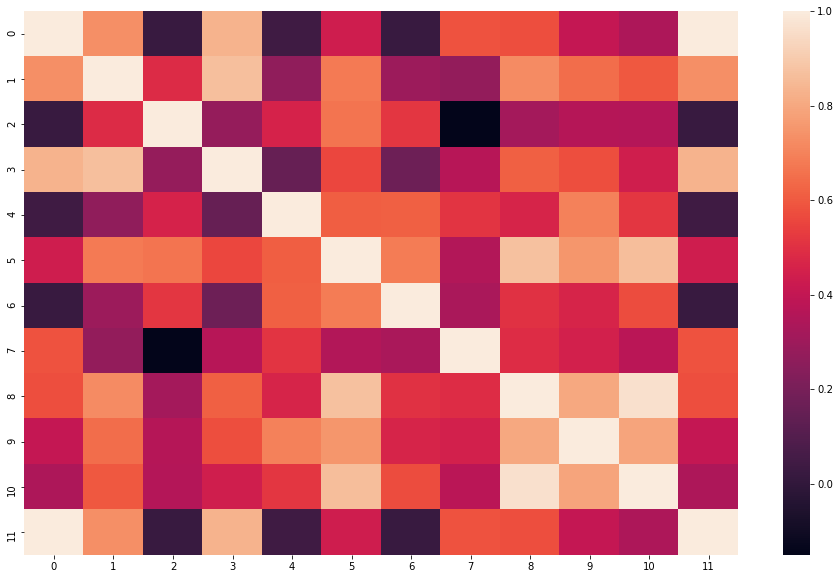

In [244]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [245]:
lesson_seq = user_lesson_rating.columns
lesson_seq_list = list(lesson_seq)
lesson_seq_list

['11', '14', '15', '16', '17', '18', '19', '2', '20', '21', '23', '8']

In [246]:
array = []
for i in range(len(lesson_seq_list)):
    coffey_hands = i
    corr_coffey_hands  = corr[coffey_hands]
    result_list = []
    per = 0.9
    while(per >= 0.1):
        temp1 = list(lesson_seq[(corr_coffey_hands >= per)])[:50]
        temp2 = list(lesson_seq[(corr_coffey_hands >= per-0.1)])[:50]
        temp3 = list(set(temp2) - set(temp1))
        cnt = 0
        for j in temp3:
            if len(result_list) < 5:
                result_list.append(j)
        per = per - 0.1
        cnt = cnt + 1
    array.append(result_list)
print(array)

[['16', '14', '20', '2', '18'], ['16', '20', '8', '11', '18'], ['18', '19', '17', '14', '21'], ['14', '8', '11', '20', '18'], ['18', '21', '19', '23', '2'], ['20', '23', '21', '17', '19'], ['18', '17', '20', '23', '15'], ['17', '11', '8', '21', '20'], ['18', '21', '14', '16', '8'], ['20', '18', '23', '17', '14'], ['18', '21', '17', '19', '14'], ['16', '14', '20', '2', '18']]


In [247]:
cursor.execute(
        """
        select nvl(max(recommand_seq), 1)
        from recommand
        """)
select = cursor.fetchall()
select_value = pd.DataFrame(select)
select_val = int(select_value.iloc[0][0])
select_val

1

In [248]:
for i in range(len(array)):
    for j in range(len(array[i])):
        cursor.execute(
        """
        insert into recommand(recommand_seq, recommand_detail_seq,
        lesson_seq, in_date)
        values
        (
        :rSeq, :rdSeq, :lessonSeq, sysdate)
        """
        ,rSeq = select_val, rdSeq = array[i][j],lessonSeq = lesson_seq_list[i])
        connection.commit()
        select_val = select_val + 1
        connection.commit()
